# Функция

*Функция* - это специально оформленный блок организованного, многократно используемого кода, который используется для выполнения определенного действия.
Вы можете передавать данные в функцию - это так называемые параметры. И можете получать данные - это результат выполнения функции.

Как вы уже знаете, Python предоставляет вам множество встроенных функций, таких как `print()` и т.д. 
Но Вы также можете создавать свои собственные функции. Эти функции называются *пользовательскими функциями*.

Рассмотрим задачу расчета площади по известным ширине и длине. Гипотетически это может пригодиться при моделировании отбора формы лепестков ({numref}`iris`) при восприятии их насекомыми.

::: {figure-md} iris
![](i/iris_petal_sepal.png)

Морфологические признаки цветка ириса 
[&copy;]( http://sebastianraschka.com/ )
:::

Возьмем два измерения прилистника (sepal) - длина и ширина. Приближенно будем считать, что прилистник имеет форму ромба, т.е. его площадь равна половине площади прямоугольника с теми же размерами.

In [1]:
l=5.9  #sepal length, см
w=3.0  #sepal width, см
(l*w)/2

8.850000000000001

Для повторного использования мы создадим функцию, которую сможем повторно использовать для аналогичных расчетов.

Определение функции начинается с оператора `def` (от англ. definition, определение).
В функции можно включать произвольное количество команд для операций с данными и возвращать итоговое значение с помощью команды `return` (возвратить).

In [2]:
def ploshad(l, w):
    '''рассчитывает площадь лепестка'''
    return (l*w)/2

ploshad(l, w)

8.850000000000001

Теперь, для разных значений длины и ширины, мы можем вычислять площадь, вызывая специально созданную для этого функцию.

In [3]:
ploshad(6.3, 2.5)

7.875

Есть также специальная форма записи определения функции в одну строчку, получившая название *ламбда*. Это упрощенная запись, где после двоеточия идет выражение, результат выполнения которого возвращается (команда return не используется).

Обратите внимание: умножение на половину - это то же самое, что деление на два.

In [4]:
ploshad_v_1_strochku = lambda l,w: 0.5*l*w

ploshad_v_1_strochku(6.3, 2.5)

7.875

Поскольку лепесток имеет форму более округлую, чем ромб, то и реальная его площадь чуть больше, чем половина прямоугольника. 

*Коэффициент* - множитель, с помощью которого мы регулируем эффект основной величины. 

Введем коэффициент в функцию как изменяемый параметр, наделив его значением по-умолчанию.

In [5]:
def ploshad(l, w, k=0.6):
    '''рассчитывает площадь лепестка
    
    ver 1.1
    '''
    return k*(l*w)

ploshad(l, w)

10.620000000000001

Мы переопределили функцию - дали ей новое определение. В данном случае смысл функции не изменился. И формат вызова остался прежним - она принимает два аргумента: длина и ширина. 
При этом функционал немного расширился: появилась возможность влиять на результат с помощью дополнительного параметра - коэффициента округлости.
Возвращаемое значение при той же форме вызова изменилось - стало чуть больше.

Поведение исходной версии функции мы можем воспроизвести, задав коэффициент со значением 0.5. Задание параметра функции может производиться несколькими способами:
- передача значения в нужной позиции;
- передача значения в паре имя=значение;
- передача переменной, которой до этого присвоили нужное значение.

In [9]:
ploshad(l, w, 0.5)

8.850000000000001

In [10]:
ploshad(l, w, k=0.5)

8.850000000000001

In [11]:
k=0.5
ploshad(l, w, k)

8.850000000000001

Данная функция будет работать с любыми типами входных данных, поддерживающих операцию умножения.

Например, объект `pandas.Series` представляет собой организованный набор значений. В наборе данных с размерами лепестков 150 цветков ириса есть отдельные колонки с длиной и шириной чашелистиков.

In [12]:
import seaborn as sns
D = sns.load_dataset('iris')
type(D.sepal_length)

pandas.core.series.Series

Посчитаем площадь прилистников для всех 150 экземпляров ирисов в наборе данных.

In [13]:
ploshad(D.sepal_length, D.sepal_width)

0      10.710
1       8.820
2       9.024
3       8.556
4      10.800
        ...  
145    12.060
146     9.450
147    11.700
148    12.648
149    10.620
Length: 150, dtype: float64

Наша простая функция справилась с этой задачей!

> Чтобы понять, что находится в аргументах, которые мы передали в нашу функцию - создайте новую ячейку, скопируйте в нее аргумент (`D.sepal_length`) и выполните. Повторите то же самое для переменной `D`, в которую мы загрузили весь набор данных.

Чтобы использовать эту же формулу для расчета площади внутренних лепестков околоцветников, можно подкорректировать коэффициент `k`.

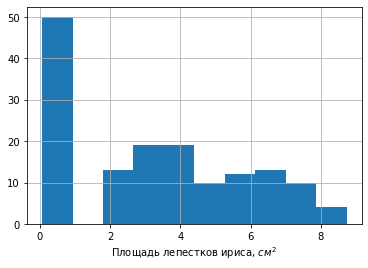

In [17]:
S = ploshad(D.petal_length, D.petal_width, k=0.55)
ax=S.hist();
ax.set_xlabel('Площадь лепестков ириса, $см^2$');

Итак, мы попробовали определить несложную пользовательскую функцию для расчета площади. Несмотря на простоту она имеет все стандартные атрибуты.
Похожим образом Вы можете написать функции, обеспечивающие необходимый Вам уникальный функционал. Вот простые правила для определения функции в Python:

1. Определение функции начинается с ключевого слова `def`, за которым следует имя функции и круглые скобки `( )`.
2.  Любые входные параметры или аргументы при вызове функции надо помещать в эти круглые скобки. При создании функции количество, тип и порядок аргументов также задаются внутри скобок.
3. Блок кода начинается с двоеточия (:) и имеет отступ. Первой строкой функции может быть необязательный оператор - строка документации функции (*doсstring*).
4. Оператор `return [result]` завершает работу функции, при необходимости возвращая результат выполнения вызывающему объекту (квадратные скобки указывают на необязательность аргумента). Оператор `return` без аргументов - это то же самое, что и оператор `return None`.